# Introduction
Julian

# Preprocessing


Database 1 contains information about suicides in each country, as for men and women for every year between 1987 and 2016.  It would seem logical to filter for the year 2015, since this year is used in the other databases. However, the registered amount of countries for that year is only 62, which is why we have chosen to compare for the year 2013, which has 80 registered countries. The data that we are interested in (suicides/100k civilians) is categorized in a certain age group, year, and country. Male and female suicides are also separated. Based on these qualifications, two separate datasets are constructed, one male, and one female. The mean suicides/100k is then calculated for both datasets, and added as a column. Then, the male and female datasets are merged together into one, also including a male-female suicide ratio (suicides/100k male / suicides/100k female).

Database 2 contains data of 185 countries, revolved around the Human Development Index (HDI)  of each country, measured in 2015 specifically. The HDI is a value between 0 and 1 (low-high) that indicates human development by looking at health, education, and standard of living. The database contains each variable that is considered for the HDI value, but we are only interested in the HDI values themselves. Thus, as for preprocessing, all columns except the country and its HDI value are removed.

Database 3 is in terms of data-context identical to the first one, yet it revolves around the Gender Development Index (GDI), instead of the HDI. The GDI is also a value between 0 and 1 (low-high), that indicates equality in human development specifically between male and female. To clarify, the higher the gender equality, the higher the GDI value will be. Similarly to the preprocessing of database one, will all rows except the country and its GDI value be removed. Finally, dataset 2 and 3 are merged together based on their shared countries. Rows that include one or more ‘empty’ values are removed from the dataset.

Database 4 contains the HDI values for 189 countries for each year from 1990 to 2019. As we are interested specifically in the HDI values for each country from the year 2013 (based on the argumentation above in dataset 1, all other years are filtered out. This database is then merged with database 2 to form a separate dataset. This dataset will be used to prove why the HDI values of 2015 can be compared with the suicide statistics of 2013, as the difference between the HDI values of 2013 and 2015 are insignificant. 

Datasets 1-4 are finally merged into one based on their shared country, which results in a dataset with 70 countries.





# 4 nearly finished visualizations

Mitch & Julian

In [1]:
# pip install matplotlib

In [2]:
# pip install seaborn

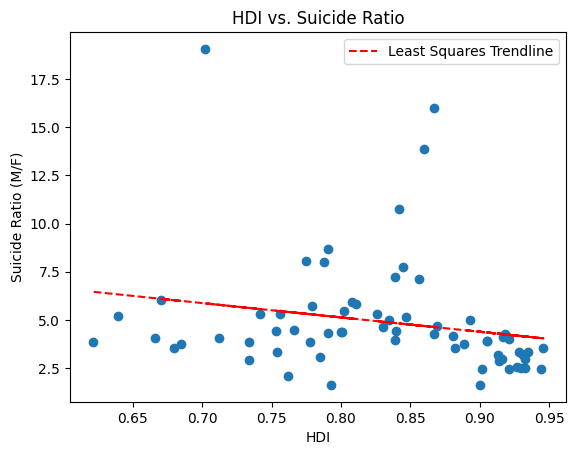

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('databases/FINAL DATASET.csv')
hdi = df['HDI 2013']
suicide_ratio = df['Suicide Ratio (M/F)']


# Convert to NumPy arrays
hdi = np.array(hdi)
suicide_ratio = np.array(suicide_ratio)

# Exclude NaN and inf values
valid_indices = np.isfinite(hdi) & np.isfinite(suicide_ratio)
hdi = hdi[valid_indices]
suicide_ratio = suicide_ratio[valid_indices]

# Calculate mean values
mean_hdi = np.mean(hdi)
mean_suicide_ratio = np.mean(suicide_ratio)

# Calculate the least squares regression line
A = np.vstack([hdi, np.ones(len(hdi))]).T
m, c = np.linalg.lstsq(A, suicide_ratio, rcond=None)[0]

# Plotting the scatter plot
plt.scatter(hdi, suicide_ratio)

# Adding the least squares trendline
plt.plot(hdi, m * hdi + c, color='r', linestyle='--', label='Least Squares Trendline')

# Adding labels and title
plt.xlabel('HDI')
plt.ylabel('Suicide Ratio (M/F)')
plt.title('HDI vs. Suicide Ratio')

# Adding legend
plt.legend()

# Display the

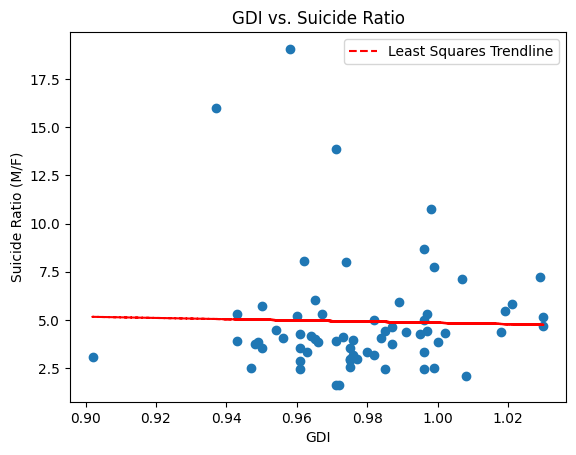

In [9]:
gdi = df['GDI 2015']
suicide_ratio = df['Suicide Ratio (M/F)']


# Convert to NumPy arrays
gdi = np.array(gdi)
suicide_ratio = np.array(suicide_ratio)

# Exclude NaN and inf values
valid_indices = np.isfinite(gdi) & np.isfinite(suicide_ratio)
gdi = gdi[valid_indices]
suicide_ratio = suicide_ratio[valid_indices]

# Calculate mean values
mean_gdi = np.mean(gdi)
mean_suicide_ratio = np.mean(suicide_ratio)


# Calculate the least squares regression line
A = np.vstack([gdi, np.ones(len(gdi))]).T
m, c = np.linalg.lstsq(A, suicide_ratio, rcond=None)[0]

# Plotting the scatter plot
plt.scatter(gdi, suicide_ratio)

# Adding the least squares trendline
plt.plot(gdi, m * gdi + c, color='r', linestyle='--', label='Least Squares Trendline')

# Adding labels and title
plt.xlabel('GDI')
plt.ylabel('Suicide Ratio (M/F)')
plt.title('GDI vs. Suicide Ratio')

# Adding legend
plt.legend()

plt.show()

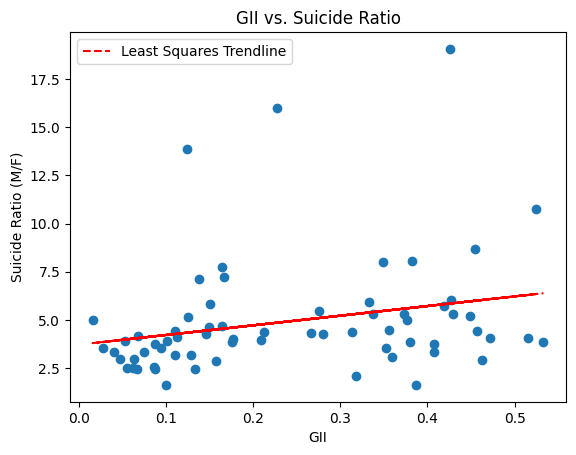

In [10]:
gii = df['GII 2015']
suicide_ratio = df['Suicide Ratio (M/F)']


# Convert to NumPy arrays
gii = np.array(gii)
suicide_ratio = np.array(suicide_ratio)

# Exclude NaN and inf values
valid_indices = np.isfinite(gii) & np.isfinite(suicide_ratio)
gii = gii[valid_indices]
suicide_ratio = suicide_ratio[valid_indices]

# Calculate mean values
mean_gii = np.mean(gii)
mean_suicide_ratio = np.mean(suicide_ratio)

# Calculate the least squares regression line
A = np.vstack([gii, np.ones(len(gii))]).T
m, c = np.linalg.lstsq(A, suicide_ratio, rcond=None)[0]

# Plotting the scatter plot
plt.scatter(gii, suicide_ratio)

# Adding the least squares trendline
plt.plot(gii, m * gii + c, color='r', linestyle='--', label='Least Squares Trendline')

# Adding labels and title
plt.xlabel('GII')
plt.ylabel('Suicide Ratio (M/F)')
plt.title('GII vs. Suicide Ratio')

# Adding legend
plt.legend()

plt.show()

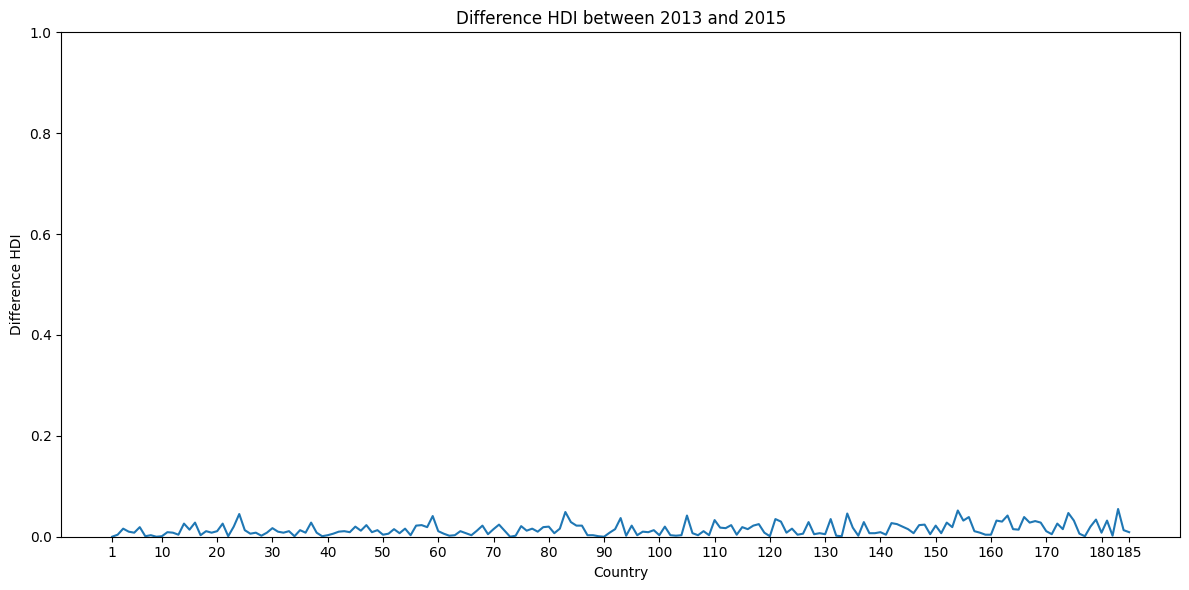

In [4]:

# Read the CSV file
data = pd.read_csv('databases/hdi_year_comparison.csv')

# Create a new DataFrame with the required columns
df = data[['Country', 'HDI 2015', 'HDI 2013']]

# Calculate the absolute difference between the two values
df['Difference'] = np.abs(df['HDI 2015'] - df['HDI 2013'])

# Convert columns to NumPy arrays
height_diff = df['Difference'].values

# Generate country numbers
country_numbers = np.arange(1, len(df) + 1)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot a line for the difference without markers
plt.plot(country_numbers, height_diff)

plt.xlabel('Country')
plt.ylabel('Difference HDI')
plt.title('Difference HDI between 2013 and 2015')

# Set x-axis tick locations and labels
xtick_values = np.arange(0, len(df), 10)
xtick_values[0] = 1  # Replace the first tick value with 1
xtick_values = np.append(xtick_values, len(df))  # Add last tick value
xtick_labels = [str(x) for x in xtick_values]
xtick_labels[-1] = str(len(df))  # Set last tick label to the number of countries
plt.xticks(xtick_values, xtick_labels)

plt.ylim(0.00, 1)
plt.tight_layout()
plt.show()

In [2]:
# Visualisatie 2

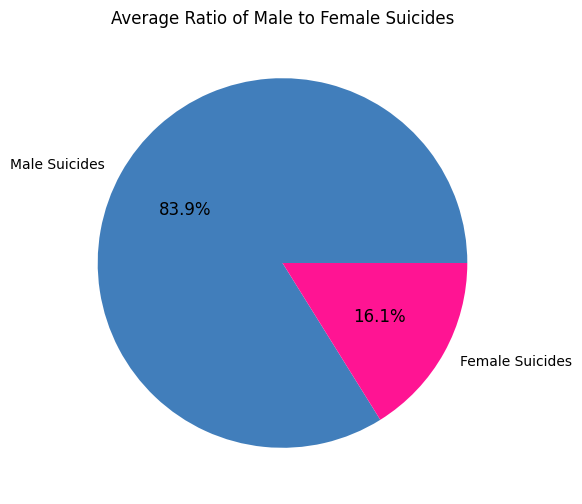

In [3]:
# Read the .csv file into a pandas DataFrame
data = pd.read_csv('databases/Suicide_database_new.csv')

# Extract the required columns
countries = data['Country']
male_suicides = data['suicides/100k male']
female_suicides = data['suicides/100k female']

# Calculate the ratio of male to female suicides for each country
ratios = male_suicides / female_suicides

# Remove NaN and negative values from the ratios
ratios = ratios.dropna().replace([-float('inf'), float('inf')], pd.NA).dropna()

# Calculate the average ratio
average_ratio = ratios.mean()

# Calculate the average percentage of the ratio
average_ratio_percentage = average_ratio / (average_ratio + 1) * 100

# Create the pie chart
colors = ['#417EBB', '#FF1493']  # Slightly darker blue represented by '#417EBB



labels = ['Male Suicides', 'Female Suicides']
plt.figure(figsize=(10, 6))
_, _, autotexts = plt.pie([average_ratio_percentage, 100 - average_ratio_percentage], labels=labels, autopct='%1.1f%%', colors=colors)

# Set the color of the percentage values to white
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.title('Average Ratio of Male to Female Suicides')

# Display the chart
plt.show()        

# Description for each of your arguments
Mitch & Lloyd